In [1]:
import matplotlib
matplotlib.use('Agg')
# import sys
# sys.path.append("/home/ec2-user/anaconda3/external/fastai/")
# sys.path.append('/scratch/arka/miniconda3/external/fastai/')


from tqdm import tqdm
tqdm.monitor_interval = 0

from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
import json
import pandas as pd
from sklearn.metrics import *

In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [5]:
from mobile_net import *

In [7]:
PATH = Path("/scratch/arka/miniconda3/external/fastai/courses/dl2/data/cifar10/")
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
stats = (np.array([ 0.4914 ,  0.48216,  0.44653]), np.array([ 0.24703,  0.24349,  0.26159]))
def get_data(sz,bs):
    tfms = tfms_from_stats(stats, sz, aug_tfms=[RandomFlip()], pad=sz//8)
    return ImageClassifierData.from_paths(PATH, val_name='test', tfms=tfms, bs=bs)

In [9]:
bs=128
sz=32

In [27]:
md_mbl = mblnetv1(depthwise_block, 
              inc_list=[64, 64, 128, 256], 
              inc_scale = 1, 
              num_blocks_list=[2, 2, 2], 
              stride_list=[1, 2, 2], 
              num_classes=10)

In [ ]:
!ls {PATH / 'train'}

In [10]:
data = get_data(sz, bs)

In [28]:
learn = ConvLearner.from_model_data(md_mbl, data)

Note: cycle_mult doesn't work with use_clr

In [29]:
learn.fit(1e-1, 4, cycle_len=1, best_save_name='mobilenetv1_2', use_clr=(20,5), metrics=[accuracy])

epoch      trn_loss   val_loss   accuracy                   
    0      1.118943   1.021824   0.6241    
    1      0.91166    0.835679   0.7008                      
    2      0.79342    0.729339   0.7428                      
    3      0.70374    0.663522   0.7704                      
    4      0.66421    0.595803   0.7951                      
    5      0.593554   0.56133    0.8036                      
    6      0.55774    0.514893   0.8215                      
    7      0.519216   0.484704   0.8344                      
    8      0.490391   0.45559    0.8441                      
    9      0.460895   0.438677   0.8471                      
    10     0.448593   0.434292   0.8499                      
    11     0.436007   0.418559   0.8575                      
    12     0.408115   0.40924    0.8609                      
    13     0.406685   0.396241   0.8643                      
    14     0.374328   0.40024    0.864                       



[array([0.40024]), 0.864]

In [31]:
learn.fit(1e-1, 4, cycle_len=2, best_save_name='mobilenetv1_3', use_clr=(20,5), metrics=[accuracy])

epoch      trn_loss   val_loss   accuracy                    
    0      0.449126   0.514294   0.8253    
    1      0.345597   0.367613   0.8758                      
    2      0.420231   0.457028   0.8492                      
    3      0.317649   0.361407   0.8762                      
    4      0.396306   0.420476   0.8555                      
    5      0.319591   0.354141   0.8785                      
    6      0.370716   0.402982   0.864                       
    7      0.297481   0.341643   0.885                       



[array([0.34164]), 0.885]

In [40]:
learn.load('mobilenetv1_2')
learn.unfreeze()

In [37]:
learn.fit(1e-1, 1, cycle_len=4, best_save_name='mobilenetv1_3n', use_clr_beta=(10,13.68,0.95,0.85), metrics=[accuracy])

epoch      trn_loss   val_loss   accuracy                    
    0      0.396055   0.472647   0.844     
    1      0.427997   0.508726   0.8318                      
    2      0.374394   0.389867   0.87                        
    3      0.306827   0.357875   0.8785                      



[array([0.35787]), 0.8785]

In [39]:
learn.fit(1e-1, 1, cycle_len=4, best_save_name='mobilenetv1_3n1', use_clr_beta=(10,13.68,0.95,0.85), wds=1e-4,
          metrics=[accuracy])

epoch      trn_loss   val_loss   accuracy                    
    0      0.407642   0.446291   0.8485    
    1      0.422231   0.498645   0.8321                      
    2      0.380923   0.408301   0.8629                      
    3      0.309915   0.361644   0.8766                      



[array([0.36164]), 0.8766]

In [42]:
learn.fit(1e-1, 1, cycle_len=10, best_save_name='mobilenetv1_3n1', use_clr_beta=(10,13.68,0.95,0.85), wds=1e-4,
          metrics=[accuracy])

epoch      trn_loss   val_loss   accuracy                    
    0      0.393812   0.431826   0.8536    
    1      0.384374   0.440803   0.8519                      
    2      0.400808   0.479631   0.8394                      
    3      0.411791   0.485716   0.8372                      
    4      0.396053   0.50257    0.8338                      
    5      0.38134    0.480679   0.8399                      
    6      0.350811   0.40914    0.8567                      
    7      0.325627   0.395329   0.8679                      
    8      0.277476   0.345041   0.8804                      
    9      0.254101   0.334013   0.8872                      



[array([0.33401]), 0.8872]

In [44]:
learn.fit(1e-2, 4, cycle_len=1, best_save_name='mobilenetv1_4n1', use_clr_beta=(10,13.68,0.95,0.85), wds=1e-4,
          metrics=[accuracy])

epoch      trn_loss   val_loss   accuracy                    
    0      0.234215   0.329687   0.89      
    1      0.244848   0.331024   0.89                        
    2      0.240107   0.32723    0.8923                      
    3      0.230011   0.329343   0.8915                      



[array([0.32934]), 0.8915]

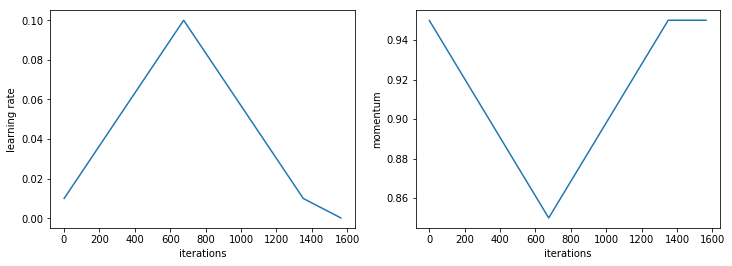

In [41]:
learn.sched.plot_lr()

In [13]:
learn.load('mobilenetv1_1')

In [14]:
learn.fit(1e-2, 2, cycle_len=10, cycle_mult=2, best_save_name='mobilenetv1_1', metrics=[accuracy])

epoch      trn_loss   val_loss   accuracy                    
    0      0.37439    0.460946   0.8474    
    1      0.375303   0.48399    0.838                       
    2      0.33792    0.43484    0.8528                      
    3      0.321283   0.411093   0.8623                      
    4      0.294801   0.403581   0.8629                      
    5      0.283703   0.385807   0.8707                      
    6      0.260451   0.374656   0.8744                      
    7      0.238994   0.367168   0.878                       
    8      0.23828    0.366056   0.8754                      
    9      0.235172   0.365442   0.8764                      
    10     0.329295   0.442654   0.854                       
    11     0.336549   0.453259   0.8509                      
    12     0.313774   0.466541   0.849                       
    13     0.313518   0.447262   0.8531                      
    14     0.310718   0.436877   0.8565                      
    15     0.286829   0.40

[array([0.35745]), 0.8838]